In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

In [67]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',250)

In [68]:
holiday = pd.read_csv('./subway/holiday.csv', encoding='cp949')
holiday

날짜1   휴일명
0     1949-01-01    신정
1     1949-01-02    신정
2     1949-01-03    신정
3     1949-03-01  3·1절
4     1949-04-05   식목일
...          ...   ...
3711  2200-09-23    추석
3712  2200-09-24    추석
3713  2200-10-03   개천절
3714  2200-10-09   한글날
3715  2200-12-25   성탄절

[3716 rows x 2 columns]

In [69]:
all_subway = glob.glob(os.path.join('./subway/', '* 20* *.csv'))

hosun = {f'{i}호선':i  for i in range(1,9)}
print(hosun)

for idx, f in enumerate(all_subway):
    subway = pd.read_csv(f, encoding='cp949', low_memory=False)
    subway['00~01'].fillna(0, inplace=True)
    for c in subway.columns[5:]:
        try:
            subway[c] = subway[c].str.replace(',','')
            subway[c] = pd.to_numeric(subway[c], errors='ignore')
            subway[c] = subway[c].astype(np.float64)
        except Exception as e:
            subway[c] = pd.to_numeric(subway[c], errors='ignore')
            subway[c] = subway[c].astype(np.float64)
    
    all_sub = subway if idx ==0 else pd.concat([all_sub, subway],axis=0)

{'1호선': 1, '2호선': 2, '3호선': 3, '4호선': 4, '5호선': 5, '6호선': 6, '7호선': 7, '8호선': 8}


In [70]:
all_sub['역번호'] = pd.to_numeric(all_sub['역번호'], errors='coerce')
all_sub['호선'].fillna(0,inplace=True)

In [71]:
all_sub['역번호'].fillna(method='bfill', inplace=True)
all_sub['역번호'] = all_sub['역번호'].astype(np.int64)

In [72]:
all_sub[all_sub['역번호'].isna()]

Empty DataFrame
Columns: [날짜, 호선, 역번호, 역명, 구분, 05~06, 06~07, 07~08, 08~09, 09~10, 10~11, 11~12, 12~13, 13~14, 14~15, 15~16, 16~17, 17~18, 18~19, 19~20, 20~21, 21~22, 22~23, 23~24, 00~01]
Index: []

In [73]:

st = {st_num : list(set(all_sub[all_sub['역번호']==st_num]['역명']))[0].strip() 
      for st_num in all_sub['역번호'].unique()}
st

{150: '서울역(150)',
 151: '시청(151)',
 152: '종각',
 153: '종로3가(153)',
 154: '종로5가(154)',
 155: '동대문(155)',
 156: '신설동',
 157: '제기동',
 158: '청량리(지하)(158)',
 159: '동묘앞(159)',
 201: '시청(201)',
 202: '을지로입구(202)',
 203: '을지로3가(203)',
 204: '을지로4가(204)',
 205: '동대문운동장(205)',
 206: '신당',
 207: '상왕십리(207)',
 208: '왕십리(성동구청)(208)',
 209: '한양대(209)',
 210: '뚝섬',
 211: '성수(211)',
 212: '건대입구',
 213: '구의(광진구청)',
 214: '강변(214)',
 215: '성내(215)',
 216: '잠실(216)',
 217: '신천(217)',
 218: '종합운동장(218)',
 219: '삼성(무역센터)',
 220: '선릉',
 221: '역삼',
 222: '강남',
 223: '교대(법원.검찰청)',
 224: '서초(224)',
 225: '방배(225)',
 226: '사당',
 227: '낙성대(227)',
 228: '서울대입구(228)',
 229: '봉천(229)',
 230: '신림(230)',
 231: '신대방',
 232: '구로디지털단지(232)',
 233: '대림(233)',
 234: '신도림',
 235: '문래(235)',
 236: '영등포구청(236)',
 237: '당산',
 238: '합정(238)',
 239: '홍대입구(239)',
 240: '신촌',
 241: '이대(241)',
 242: '아현(242)',
 243: '충정로(경기대입구)',
 244: '용답(244)',
 245: '신답(245)',
 246: '신설동',
 247: '도림천(247)',
 248: '양천구청(248)',
 249: '신정네거리(249)',

In [74]:
st_line_dict = {}
for st_num in all_sub['역번호'].unique():
    st_line = list(set(all_sub[all_sub['역번호']==st_num]['호선']))
    st_line = [l for l in st_line if (isinstance(l, str) is False) and (l!=0)][0]
    st_line_dict[st_num] = st_line

In [75]:
all_sub['호선'] = all_sub['역번호'].map(st_line_dict)

In [76]:
display(all_sub.head())

all_sub.drop(['역명'],axis=1, inplace=True)
all_sub

날짜  호선  역번호        역명  구분  05~06   06~07   07~08   08~09   09~10  \
0  2011-01-01   1  150  서울역(150)  승차  459.0   458.0   593.0  1054.0  1771.0   
1  2011-01-01   1  150  서울역(150)  하차  283.0  1354.0  1581.0  1786.0  2408.0   
2  2011-01-01   1  151   시청(151)  승차   91.0    85.0    97.0   179.0   273.0   
3  2011-01-01   1  151   시청(151)  하차   37.0   168.0   269.0   351.0   393.0   
4  2011-01-01   1  152   종각(152)  승차  931.0   654.0   287.0   323.0   332.0   

    10~11   11~12   12~13   13~14   14~15   15~16   16~17   17~18   18~19  \
0  2359.0  3155.0  3547.0  3390.0  3116.0  3895.0  3698.0  3822.0  3685.0   
1  2430.0  2421.0  2800.0  2683.0  2615.0  2806.0  2571.0  2614.0  1974.0   
2   195.0   273.0   417.0   475.0   680.0   990.0   996.0  1090.0  1154.0   
3   512.0   657.0   849.0   972.0   969.0   981.0   805.0   663.0   441.0   
4   438.0   550.0   798.0  1056.0  1250.0  1628.0  2117.0  2518.0  2388.0   

    19~20   20~21   21~22   22~23   23~24  00~01  
0  3257.0  3167.0  2811.0  2615.0  1048.0   41.0  
1  1875.0  1594.0  1368.0  1500.0   697.0  216.0  
2   863.0   891.0   884.0   490.0   168.0    6.0  
3   323.0   225.0   218.0   154.0    82.0   49.0  
4  2010.0  2236.0  2630.0  2442.0  1275.0   28.0

날짜  호선   역번호  구분  05~06   06~07   07~08   08~09   09~10  \
0       2011-01-01   1   150  승차  459.0   458.0   593.0  1054.0  1771.0   
1       2011-01-01   1   150  하차  283.0  1354.0  1581.0  1786.0  2408.0   
2       2011-01-01   1   151  승차   91.0    85.0    97.0   179.0   273.0   
3       2011-01-01   1   151  하차   37.0   168.0   269.0   351.0   393.0   
4       2011-01-01   1   152  승차  931.0   654.0   287.0   323.0   332.0   
...            ...  ..   ...  ..    ...     ...     ...     ...     ...   
200745  2015-12-31   8  2823  하차   60.0   162.0   417.0   952.0   491.0   
200746  2015-12-31   8  2824  하차   48.0   207.0   432.0   804.0   386.0   
200747  2015-12-31   8  2825  하차   26.0    73.0   103.0   230.0   233.0   
200748  2015-12-31   8  2826  하차   38.0    67.0   115.0   326.0   211.0   
200749  2015-12-31   8  2827  하차   60.0    84.0   138.0   283.0   150.0   

         10~11   11~12   12~13   13~14   14~15   15~16   16~17   17~18  \
0       2359.0  3155.0  3547.0  3390.0  3116.0  3895.0  3698.0  3822.0   
1       2430.0  2421.0  2800.0  2683.0  2615.0  2806.0  2571.0  2614.0   
2        195.0   273.0   417.0   475.0   680.0   990.0   996.0  1090.0   
3        512.0   657.0   849.0   972.0   969.0   981.0   805.0   663.0   
4        438.0   550.0   798.0  1056.0  1250.0  1628.0  2117.0  2518.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
200745   296.0   398.0   431.0   529.0   527.0   750.0   890.0  1003.0   
200746   347.0   322.0   415.0   423.0   624.0   703.0   940.0   961.0   
200747   220.0   196.0   307.0   353.0   464.0   423.0   554.0   532.0   
200748   181.0   225.0   235.0   291.0   334.0   348.0   386.0   439.0   
200749   181.0   164.0   167.0   173.0   213.0   260.0   284.0   284.0   

         18~19   19~20   20~21   21~22   22~23   23~24  00~01  
0       3685.0  3257.0  3167.0  2811.0  2615.0  1048.0   41.0  
1       1974.0  1875.0  1594.0  1368.0  1500.0   697.0  216.0  
2       1154.0   863.0   891.0   884.0   490.0   168.0    6.0  
3        441.0   323.0   225.0   218.0   154.0    82.0   49.0  
4       2388.0  2010.0  2236.0  2630.0  2442.0  1275.0   28.0  
...        ...     ...     ...     ...     ...     ...    ...  
200745  1414.0  1206.0   826.0   757.0   803.0   484.0  353.0  
200746  1442.0  1296.0  1019.0   739.0   772.0   565.0  339.0  
200747   660.0   632.0   470.0   315.0   341.0   263.0  158.0  
200748   464.0   397.0   316.0   285.0   317.0   215.0  121.0  
200749   290.0   290.0   167.0   172.0   130.0   102.0  235.0  

[2979920 rows x 24 columns]

In [77]:
sum_sub = all_sub.copy()

sum_info = sum_sub.iloc[::2, :3].reset_index(drop=True)
sum_time = sum_sub.iloc[::2, 4:].reset_index(drop=True) + sum_sub.iloc[1::2, 4:].reset_index(drop=True)
sum_df = pd.concat([sum_info, sum_time], axis=1)
sum_df

날짜  호선   역번호  05~06   06~07   07~08   08~09   09~10   10~11  \
0        2011-01-01   1   150  742.0  1812.0  2174.0  2840.0  4179.0  4789.0   
1        2011-01-01   1   151  128.0   253.0   366.0   530.0   666.0   707.0   
2        2011-01-01   1   152  989.0   876.0   537.0   913.0  1206.0  1307.0   
3        2011-01-01   1   153  312.0   304.0   256.0   401.0   921.0  1275.0   
4        2011-01-01   1   154   69.0   160.0   190.0   249.0   392.0   467.0   
...             ...  ..   ...    ...     ...     ...     ...     ...     ...   
1489955  2015-12-31   8  2818  188.0   823.0   868.0  2338.0   977.0   552.0   
1489956  2015-12-31   8  2820  156.0  1100.0  1039.0  2464.0  1471.0   771.0   
1489957  2015-12-31   8  2822   86.0   263.0   556.0  1215.0   661.0   491.0   
1489958  2015-12-31   8  2824   74.0   280.0   535.0  1034.0   619.0   567.0   
1489959  2015-12-31   8  2826   98.0   151.0   253.0   609.0   361.0   362.0   

          11~12   12~13   13~14   14~15   15~16   16~17   17~18   18~19  \
0        5576.0  6347.0  6073.0  5731.0  6701.0  6269.0  6436.0  5659.0   
1         930.0  1266.0  1447.0  1649.0  1971.0  1801.0  1753.0  1595.0   
2        1705.0  2206.0  2891.0  3140.0  3592.0  4180.0  4861.0  4693.0   
3        1922.0  2888.0  3461.0  3556.0  3734.0  3424.0  3205.0  2631.0   
4         802.0  1148.0  1303.0  1363.0  1496.0  1315.0  1402.0  1084.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
1489955   539.0   604.0   617.0   666.0   743.0   749.0   892.0  1088.0   
1489956   813.0   903.0   887.0   908.0  1016.0  1140.0  1467.0  1752.0   
1489957   605.0   677.0   803.0   847.0  1221.0  1477.0  1666.0  2251.0   
1489958   518.0   722.0   776.0  1088.0  1126.0  1494.0  1493.0  2102.0   
1489959   389.0   402.0   464.0   547.0   608.0   670.0   723.0   754.0   

          19~20   20~21   21~22   22~23   23~24  00~01  
0        5132.0  4761.0  4179.0  4115.0  1745.0  257.0  
1        1186.0  1116.0  1102.0   644.0   250.0   55.0  
2        3389.0  3135.0  3156.0  2820.0  1492.0   70.0  
3        2023.0  1630.0  1505.0  1375.0   778.0  119.0  
4         692.0   523.0   539.0   305.0   185.0   23.0  
...         ...     ...     ...     ...     ...    ...  
1489955   915.0   595.0   482.0   453.0   264.0  243.0  
1489956  1798.0  1214.0   946.0   794.0   560.0  459.0  
1489957  1899.0  1396.0  1267.0  1323.0   845.0  623.0  
1489958  1928.0  1489.0  1054.0  1113.0   828.0  497.0  
1489959   687.0   483.0   457.0   447.0   317.0  356.0  

[1489960 rows x 23 columns]

In [78]:
time_columns = ['05~06','06~07','07~08','08~09','09~10','10~11','11~12','12~13','13~14',
                    '14~15','15~16','16~17','17~18','18~19','19~20','20~21','21~22','22~23','23~24','00~01']

df_pivoted = pd.melt(sum_df, id_vars=['날짜','호선','역번호'],
                    value_vars = time_columns, var_name='시간', value_name='flow_sum')

In [79]:
df_pivoted.columns = ['Date', 'Line_num', 'Station_num', 'Time', 'flow_sum']

In [80]:
df_pivoted.sort_values(['Date'], inplace=True)
df_pivoted.reset_index(drop=True, inplace=True)

In [81]:
df_pivoted

Date  Line_num  Station_num   Time  flow_sum
0          2008-01-01          4          423  05~06     180.0
1          2008-01-01          4          409  19~20     832.0
2          2008-01-01          4          410  19~20    1141.0
3          2008-01-01          4          411  19~20    1848.0
4          2008-01-01          4          412  19~20    1985.0
...                ...       ...          ...    ...       ...
29799195    2022-12-31         6         2614  14~15     258.0
29799196    2022-12-31         6         2613  14~15     556.0
29799197    2022-12-31         6         2612  14~15     373.0
29799198    2022-12-31         6         2621  14~15    1079.0
29799199    2022-12-31         8         2827  10~11     344.0

[29799200 rows x 5 columns]

In [82]:
df_new = pd.merge(df_pivoted, holiday, left_on='Date', right_on='날짜1', how='left')

# 공휴일 컬럼 만들기 공휴일일때 1 아닐때 0
df_new['holiday'] = df_new['휴일명'].apply(lambda x: 1 if pd.notnull(x) else 0)

# 필요없는 컬럼 삭제 
df_new.drop(['날짜1','휴일명'], axis=1, inplace=True)

df_new

Date  Line_num  Station_num   Time  flow_sum  holiday
0          2008-01-01          4          423  05~06     180.0        0
1          2008-01-01          4          409  19~20     832.0        0
2          2008-01-01          4          410  19~20    1141.0        0
3          2008-01-01          4          411  19~20    1848.0        0
4          2008-01-01          4          412  19~20    1985.0        0
...                ...       ...          ...    ...       ...      ...
29799195    2022-12-31         6         2614  14~15     258.0        0
29799196    2022-12-31         6         2613  14~15     556.0        0
29799197    2022-12-31         6         2612  14~15     373.0        0
29799198    2022-12-31         6         2621  14~15    1079.0        0
29799199    2022-12-31         8         2827  10~11     344.0        0

[29799200 rows x 6 columns]

In [83]:

time_map = {
    '05~06': '05:00',
    '06~07': '06:00',
    '07~08': '07:00',
    '08~09': '08:00',
    '09~10': '09:00',
    '10~11': '10:00',
    '11~12': '11:00',
    '12~13': '12:00',
    '13~14': '13:00',
    '14~15': '14:00',
    '15~16': '15:00',
    '16~17': '16:00',
    '17~18': '17:00',
    '18~19': '18:00',
    '19~20': '19:00',
    '20~21': '20:00',
    '21~22': '21:00',
    '22~23': '22:00',
    '23~24': '23:00',
    '00~01': '00:00'
}

df_new['Time'] = df_new['Time'].map(time_map)

In [84]:
df_new

Date  Line_num  Station_num   Time  flow_sum  holiday
0          2008-01-01          4          423  05:00     180.0        0
1          2008-01-01          4          409  19:00     832.0        0
2          2008-01-01          4          410  19:00    1141.0        0
3          2008-01-01          4          411  19:00    1848.0        0
4          2008-01-01          4          412  19:00    1985.0        0
...                ...       ...          ...    ...       ...      ...
29799195    2022-12-31         6         2614  14:00     258.0        0
29799196    2022-12-31         6         2613  14:00     556.0        0
29799197    2022-12-31         6         2612  14:00     373.0        0
29799198    2022-12-31         6         2621  14:00    1079.0        0
29799199    2022-12-31         8         2827  10:00     344.0        0

[29799200 rows x 6 columns]

In [85]:
df_new['holiday'].value_counts()

0    28686960
1     1112240
Name: holiday, dtype: int64

In [86]:
df_new['Date'] = pd.to_datetime(df_new['Date'])

# 월요일 : 1, 화요일 : 2, ..., 일요일 : 7
df_new['weekday'] = df_new['Date'].dt.weekday + 1

df_new

Date  Line_num  Station_num   Time  flow_sum  holiday  weekday
0        2008-01-01         4          423  05:00     180.0        0        2
1        2008-01-01         4          409  19:00     832.0        0        2
2        2008-01-01         4          410  19:00    1141.0        0        2
3        2008-01-01         4          411  19:00    1848.0        0        2
4        2008-01-01         4          412  19:00    1985.0        0        2
...             ...       ...          ...    ...       ...      ...      ...
29799195 2022-12-31         6         2614  14:00     258.0        0        6
29799196 2022-12-31         6         2613  14:00     556.0        0        6
29799197 2022-12-31         6         2612  14:00     373.0        0        6
29799198 2022-12-31         6         2621  14:00    1079.0        0        6
29799199 2022-12-31         8         2827  10:00     344.0        0        6

[29799200 rows x 7 columns]

In [87]:
import numpy as np

# 토요일, 일요일, 공휴일 일때 휴일 1로 지정 
df_new['holiday'] = np.where((df_new['holiday'] == 1) | (df_new['weekday'].isin([6, 7])), 1, 0)
df_new['holiday'].value_counts()

0    20518580
1     9280620
Name: holiday, dtype: int64

In [94]:
weather = pd.read_csv('./weather/2008~2022_weather.csv', encoding='cp949')
weather.shape

(131490, 8)

In [95]:
weather[['강수량(mm)', '적설(cm)']] = weather[['강수량(mm)', '적설(cm)']].fillna(0)
weather

지점 지점명                일시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)
0       108  서울  2008-01-01 00:00    -7.0      0.0      3.5   52.0     0.0
1       108  서울  2008-01-01 01:00    -7.3      0.0      4.9   52.0     0.0
2       108  서울  2008-01-01 02:00    -7.5      0.0      4.1   52.0     0.0
3       108  서울  2008-01-01 03:00    -7.8      0.0      3.9   52.0     0.0
4       108  서울  2008-01-01 04:00    -7.9      0.0      4.0   53.0     0.0
...     ...  ..               ...     ...      ...      ...    ...     ...
131485  108  서울  2022-12-31 19:00    -0.2      0.0      1.8   73.0     0.0
131486  108  서울  2022-12-31 20:00    -0.8      0.0      1.4   75.0     0.0
131487  108  서울  2022-12-31 21:00    -1.0      0.0      0.9   77.0     0.0
131488  108  서울  2022-12-31 22:00    -0.8      0.0      0.5   78.0     0.0
131489  108  서울  2022-12-31 23:00    -0.2      0.0      1.3   77.0     0.0

[131490 rows x 8 columns]

In [96]:
# Convert date and time to datetime format
weather['일시'] = pd.to_datetime(weather['일시'])

# Extract date in yyyy-mm-dd format
weather['Date'] = weather['일시'].dt.strftime('%Y-%m-%d')

# Extract time in hh:mm format
weather['Time'] = weather['일시'].dt.strftime('%H:%M')

weather = weather.drop(columns = ['지점','지점명','일시'])
weather.columns = ['Temp', 'Rainfall_amt', 'Wind_speed', 'Humidity', 'Snow_amt', 'Date', 'Time'] 
# Output the updated data frame
weather

Temp  Rainfall_amt  Wind_speed  Humidity  Snow_amt        Date   Time
0       -7.0           0.0         3.5      52.0       0.0  2008-01-01  00:00
1       -7.3           0.0         4.9      52.0       0.0  2008-01-01  01:00
2       -7.5           0.0         4.1      52.0       0.0  2008-01-01  02:00
3       -7.8           0.0         3.9      52.0       0.0  2008-01-01  03:00
4       -7.9           0.0         4.0      53.0       0.0  2008-01-01  04:00
...      ...           ...         ...       ...       ...         ...    ...
131485  -0.2           0.0         1.8      73.0       0.0  2022-12-31  19:00
131486  -0.8           0.0         1.4      75.0       0.0  2022-12-31  20:00
131487  -1.0           0.0         0.9      77.0       0.0  2022-12-31  21:00
131488  -0.8           0.0         0.5      78.0       0.0  2022-12-31  22:00
131489  -0.2           0.0         1.3      77.0       0.0  2022-12-31  23:00

[131490 rows x 7 columns]

In [97]:
w_mean = weather.groupby(['Date']).mean()
w_mean.columns = [f'{c}_mean' for c in w_mean.columns] 

w_sum = weather.groupby(['Date'])[['Rainfall_amt', 'Snow_amt']].sum()
w_sum.columns = [f'{c}_sum' for c in w_sum.columns] 

w_max = weather.groupby(['Date'])[['Temp']].max()
w_max.columns = [f'{c}_max' for c in w_max.columns] 

w_min = weather.groupby(['Date'])[['Temp']].min()
w_min.columns = [f'{c}_min' for c in w_min.columns] 

w_stats = pd.concat([w_mean, w_sum, w_max, w_min],axis=1)
w_stats['Temp_diff'] = np.abs(w_max.values - w_min.values)

w_stats = pd.DataFrame(w_stats).reset_index(drop=False)
display(w_stats)

Date  Temp_mean  Rainfall_amt_mean  Wind_speed_mean  \
0     2008-01-01  -6.337500           0.000000         3.766667   
1     2008-01-02  -3.720833           0.000000         2.216667   
2     2008-01-03   0.866667           0.000000         2.416667   
3     2008-01-04  -0.379167           0.000000         2.116667   
4     2008-01-05   1.504167           0.000000         1.466667   
...          ...        ...                ...              ...   
5474  2022-12-27  -2.641667           0.000000         1.766667   
5475  2022-12-28  -2.916667           0.004167         2.458333   
5476  2022-12-29  -3.295833           0.000000         1.725000   
5477  2022-12-30  -1.383333           0.000000         1.925000   
5478  2022-12-31  -1.654167           0.000000         1.354167   

      Humidity_mean  Snow_amt_mean  Rainfall_amt_sum  Snow_amt_sum  Temp_max  \
0         47.541667       0.000000               0.0           0.0      -3.4   
1         49.708333       0.000000               0.0           0.0       0.4   
2         51.500000       0.000000               0.0           0.0       6.4   
3         55.583333       0.000000               0.0           0.0       3.5   
4         60.500000       0.000000               0.0           0.0       5.6   
...             ...            ...               ...           ...       ...   
5474      69.208333       0.145833               0.0           3.5       3.0   
5475      58.916667       0.120833               0.1           2.9      -0.3   
5476      54.375000       0.000000               0.0           0.0       1.7   
5477      65.708333       0.000000               0.0           0.0       2.1   
5478      65.708333       0.000000               0.0           0.0       2.1   

      Temp_min  Temp_diff  
0         -8.3        4.9  
1         -7.1        7.5  
2         -3.0        9.4  
3         -4.0        7.5  
4         -2.0        7.6  
...        ...        ...  
5474      -7.3       10.3  
5475      -5.4        5.1  
5476      -7.8        9.5  
5477      -4.0        6.1  
5478      -4.9        7.0  

[5479 rows x 11 columns]

In [98]:
weather = pd.merge(left=weather, right=w_stats, how='left', on='Date')
weather

Temp  Rainfall_amt  Wind_speed  Humidity  Snow_amt        Date   Time  \
0       -7.0           0.0         3.5      52.0       0.0  2008-01-01  00:00   
1       -7.3           0.0         4.9      52.0       0.0  2008-01-01  01:00   
2       -7.5           0.0         4.1      52.0       0.0  2008-01-01  02:00   
3       -7.8           0.0         3.9      52.0       0.0  2008-01-01  03:00   
4       -7.9           0.0         4.0      53.0       0.0  2008-01-01  04:00   
...      ...           ...         ...       ...       ...         ...    ...   
131485  -0.2           0.0         1.8      73.0       0.0  2022-12-31  19:00   
131486  -0.8           0.0         1.4      75.0       0.0  2022-12-31  20:00   
131487  -1.0           0.0         0.9      77.0       0.0  2022-12-31  21:00   
131488  -0.8           0.0         0.5      78.0       0.0  2022-12-31  22:00   
131489  -0.2           0.0         1.3      77.0       0.0  2022-12-31  23:00   

        Temp_mean  Rainfall_amt_mean  Wind_speed_mean  Humidity_mean  \
0       -6.337500                0.0         3.766667      47.541667   
1       -6.337500                0.0         3.766667      47.541667   
2       -6.337500                0.0         3.766667      47.541667   
3       -6.337500                0.0         3.766667      47.541667   
4       -6.337500                0.0         3.766667      47.541667   
...           ...                ...              ...            ...   
131485  -1.654167                0.0         1.354167      65.708333   
131486  -1.654167                0.0         1.354167      65.708333   
131487  -1.654167                0.0         1.354167      65.708333   
131488  -1.654167                0.0         1.354167      65.708333   
131489  -1.654167                0.0         1.354167      65.708333   

        Snow_amt_mean  Rainfall_amt_sum  Snow_amt_sum  Temp_max  Temp_min  \
0                 0.0               0.0           0.0      -3.4      -8.3   
1                 0.0               0.0           0.0      -3.4      -8.3   
2                 0.0               0.0           0.0      -3.4      -8.3   
3                 0.0               0.0           0.0      -3.4      -8.3   
4                 0.0               0.0           0.0      -3.4      -8.3   
...               ...               ...           ...       ...       ...   
131485            0.0               0.0           0.0       2.1      -4.9   
131486            0.0               0.0           0.0       2.1      -4.9   
131487            0.0               0.0           0.0       2.1      -4.9   
131488            0.0               0.0           0.0       2.1      -4.9   
131489            0.0               0.0           0.0       2.1      -4.9   

        Temp_diff  
0             4.9  
1             4.9  
2             4.9  
3             4.9  
4             4.9  
...           ...  
131485        7.0  
131486        7.0  
131487        7.0  
131488        7.0  
131489        7.0  

[131490 rows x 17 columns]

In [100]:
df_new['Date'] = pd.to_datetime(df_new['Date'])

weather['Date'] = pd.to_datetime(weather['Date'])

In [101]:
subway_weather_df= pd.merge(df_new, weather, on=['Date', 'Time'], how='left')

In [102]:
subway_weather_df.sort_values(['Date', 'Time'], inplace=True)
subway_weather_df.reset_index(drop=True, inplace=True)

In [103]:
subway_weather_df

Date  Line_num  Station_num   Time  flow_sum  holiday  weekday  \
0        2008-01-01         2          216  00:00     449.0        0        2   
1        2008-01-01         2          217  00:00     149.0        0        2   
2        2008-01-01         2          218  00:00      46.0        0        2   
3        2008-01-01         2          219  00:00     504.0        0        2   
4        2008-01-01         2          220  00:00     139.0        0        2   
...             ...       ...          ...    ...       ...      ...      ...   
29799195 2022-12-31         6         2616  23:00     168.0        1        6   
29799196 2022-12-31         6         2614  23:00     101.0        1        6   
29799197 2022-12-31         6         2613  23:00     175.0        1        6   
29799198 2022-12-31         6         2612  23:00     141.0        1        6   
29799199 2022-12-31         6         2621  23:00     383.0        1        6   

          Temp  Rainfall_amt  Wind_speed  Humidity  Snow_amt  Temp_mean  \
0         -7.0           0.0         3.5      52.0       0.0  -6.337500   
1         -7.0           0.0         3.5      52.0       0.0  -6.337500   
2         -7.0           0.0         3.5      52.0       0.0  -6.337500   
3         -7.0           0.0         3.5      52.0       0.0  -6.337500   
4         -7.0           0.0         3.5      52.0       0.0  -6.337500   
...        ...           ...         ...       ...       ...        ...   
29799195  -0.2           0.0         1.3      77.0       0.0  -1.654167   
29799196  -0.2           0.0         1.3      77.0       0.0  -1.654167   
29799197  -0.2           0.0         1.3      77.0       0.0  -1.654167   
29799198  -0.2           0.0         1.3      77.0       0.0  -1.654167   
29799199  -0.2           0.0         1.3      77.0       0.0  -1.654167   

          Rainfall_amt_mean  Wind_speed_mean  Humidity_mean  Snow_amt_mean  \
0                       0.0         3.766667      47.541667            0.0   
1                       0.0         3.766667      47.541667            0.0   
2                       0.0         3.766667      47.541667            0.0   
3                       0.0         3.766667      47.541667            0.0   
4                       0.0         3.766667      47.541667            0.0   
...                     ...              ...            ...            ...   
29799195                0.0         1.354167      65.708333            0.0   
29799196                0.0         1.354167      65.708333            0.0   
29799197                0.0         1.354167      65.708333            0.0   
29799198                0.0         1.354167      65.708333            0.0   
29799199                0.0         1.354167      65.708333            0.0   

          Rainfall_amt_sum  Snow_amt_sum  Temp_max  Temp_min  Temp_diff  
0                      0.0           0.0      -3.4      -8.3        4.9  
1                      0.0           0.0      -3.4      -8.3        4.9  
2                      0.0           0.0      -3.4      -8.3        4.9  
3                      0.0           0.0      -3.4      -8.3        4.9  
4                      0.0           0.0      -3.4      -8.3        4.9  
...                    ...           ...       ...       ...        ...  
29799195               0.0           0.0       2.1      -4.9        7.0  
29799196               0.0           0.0       2.1      -4.9        7.0  
29799197               0.0           0.0       2.1      -4.9        7.0  
29799198               0.0           0.0       2.1      -4.9        7.0  
29799199               0.0           0.0       2.1      -4.9        7.0  

[29799200 rows x 22 columns]

<AxesSubplot:>

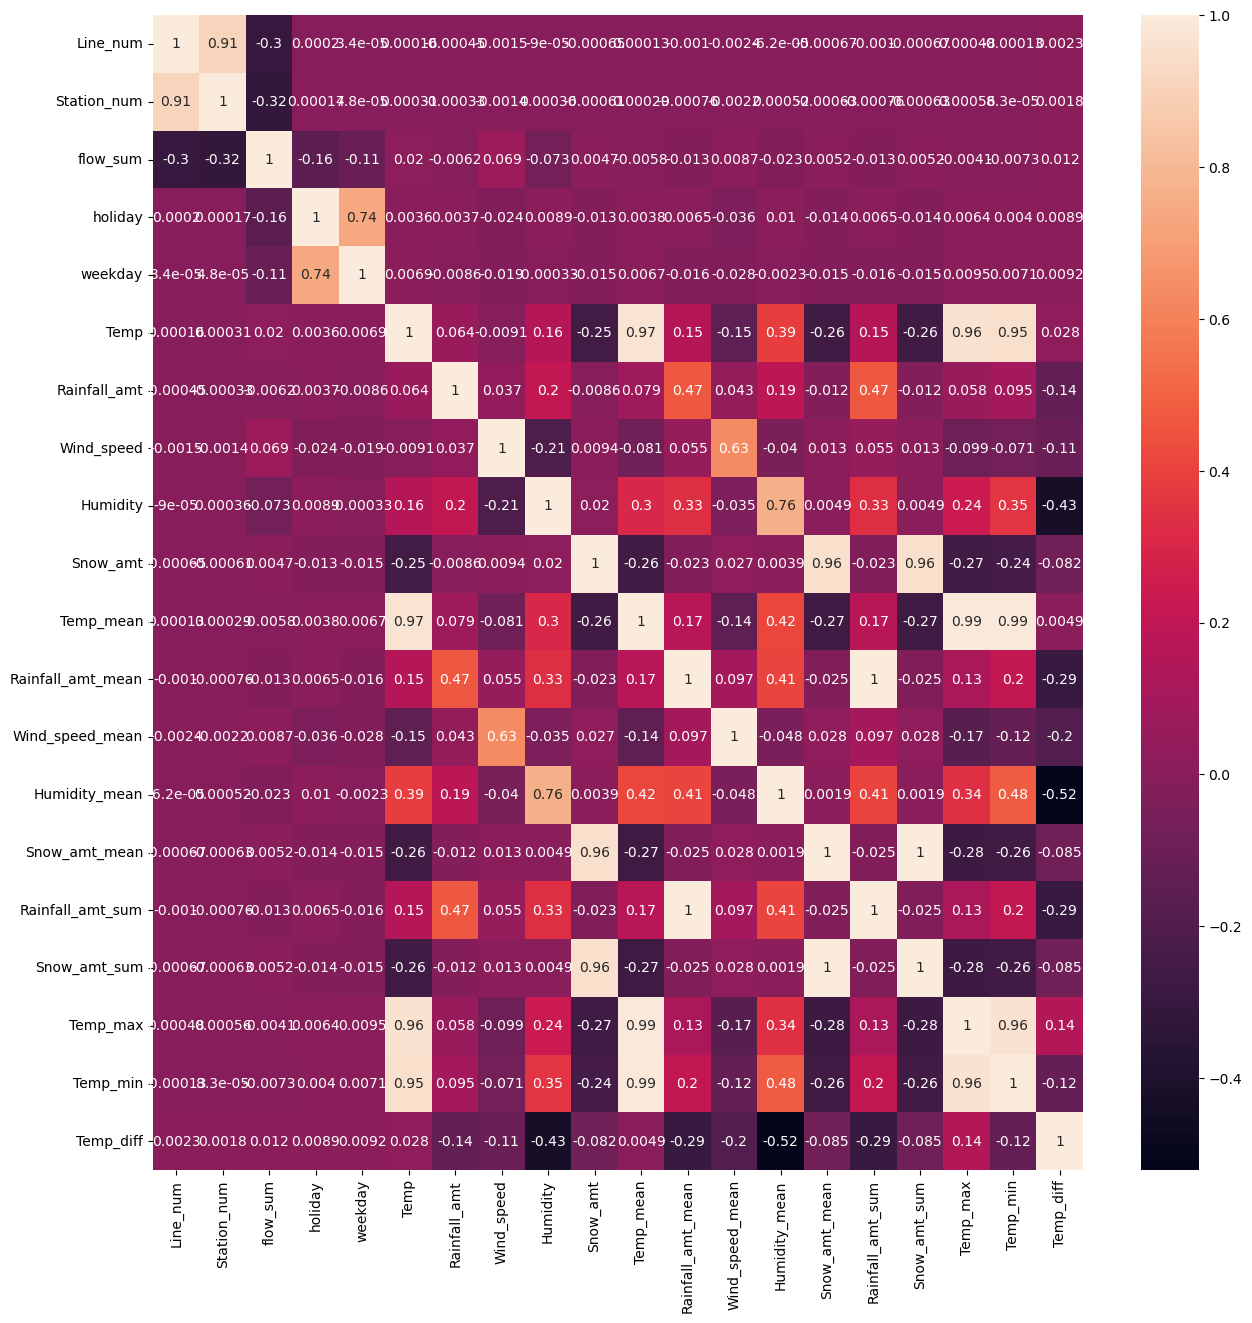

In [105]:
corr = subway_weather_df.corr()


plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

In [107]:

subway_weather_df['datetime-hour']= pd.to_datetime(subway_weather_df['Time']).dt.hour
subway_weather_df["datetime-year"] = subway_weather_df["Date"].dt.year
subway_weather_df["datetime-month"] = subway_weather_df["Date"].dt.month
subway_weather_df["datetime-day"] = subway_weather_df["Date"].dt.day

print(subway_weather_df.shape)


(29799200, 27)


In [108]:
subway_weather_df

Date  Line_num  Station_num   Time  flow_sum  holiday  weekday  \
0        2008-01-01         2          216  00:00     449.0        0        2   
1        2008-01-01         2          217  00:00     149.0        0        2   
2        2008-01-01         2          218  00:00      46.0        0        2   
3        2008-01-01         2          219  00:00     504.0        0        2   
4        2008-01-01         2          220  00:00     139.0        0        2   
...             ...       ...          ...    ...       ...      ...      ...   
29799195 2022-12-31         6         2616  23:00     168.0        1        6   
29799196 2022-12-31         6         2614  23:00     101.0        1        6   
29799197 2022-12-31         6         2613  23:00     175.0        1        6   
29799198 2022-12-31         6         2612  23:00     141.0        1        6   
29799199 2022-12-31         6         2621  23:00     383.0        1        6   

          Temp  Rainfall_amt  Wind_speed  Humidity  Snow_amt  Temp_mean  \
0         -7.0           0.0         3.5      52.0       0.0  -6.337500   
1         -7.0           0.0         3.5      52.0       0.0  -6.337500   
2         -7.0           0.0         3.5      52.0       0.0  -6.337500   
3         -7.0           0.0         3.5      52.0       0.0  -6.337500   
4         -7.0           0.0         3.5      52.0       0.0  -6.337500   
...        ...           ...         ...       ...       ...        ...   
29799195  -0.2           0.0         1.3      77.0       0.0  -1.654167   
29799196  -0.2           0.0         1.3      77.0       0.0  -1.654167   
29799197  -0.2           0.0         1.3      77.0       0.0  -1.654167   
29799198  -0.2           0.0         1.3      77.0       0.0  -1.654167   
29799199  -0.2           0.0         1.3      77.0       0.0  -1.654167   

          Rainfall_amt_mean  Wind_speed_mean  Humidity_mean  Snow_amt_mean  \
0                       0.0         3.766667      47.541667            0.0   
1                       0.0         3.766667      47.541667            0.0   
2                       0.0         3.766667      47.541667            0.0   
3                       0.0         3.766667      47.541667            0.0   
4                       0.0         3.766667      47.541667            0.0   
...                     ...              ...            ...            ...   
29799195                0.0         1.354167      65.708333            0.0   
29799196                0.0         1.354167      65.708333            0.0   
29799197                0.0         1.354167      65.708333            0.0   
29799198                0.0         1.354167      65.708333            0.0   
29799199                0.0         1.354167      65.708333            0.0   

          Rainfall_amt_sum  Snow_amt_sum  Temp_max  Temp_min  Temp_diff  hour  \
0                      0.0           0.0      -3.4      -8.3        4.9     0   
1                      0.0           0.0      -3.4      -8.3        4.9     0   
2                      0.0           0.0      -3.4      -8.3        4.9     0   
3                      0.0           0.0      -3.4      -8.3        4.9     0   
4                      0.0           0.0      -3.4      -8.3        4.9     0   
...                    ...           ...       ...       ...        ...   ...   
29799195               0.0           0.0       2.1      -4.9        7.0    23   
29799196               0.0           0.0       2.1      -4.9        7.0    23   
29799197               0.0           0.0       2.1      -4.9        7.0    23   
29799198               0.0           0.0       2.1      -4.9        7.0    23   
29799199               0.0           0.0       2.1      -4.9        7.0    23   

          datetime-year  datetime-month  datetime-day  datetime-hour  
0                  2008               1             1              0  
1                  2008               1             1              0  
2                 

<AxesSubplot:xlabel='datetime-year', ylabel='flow_sum'>

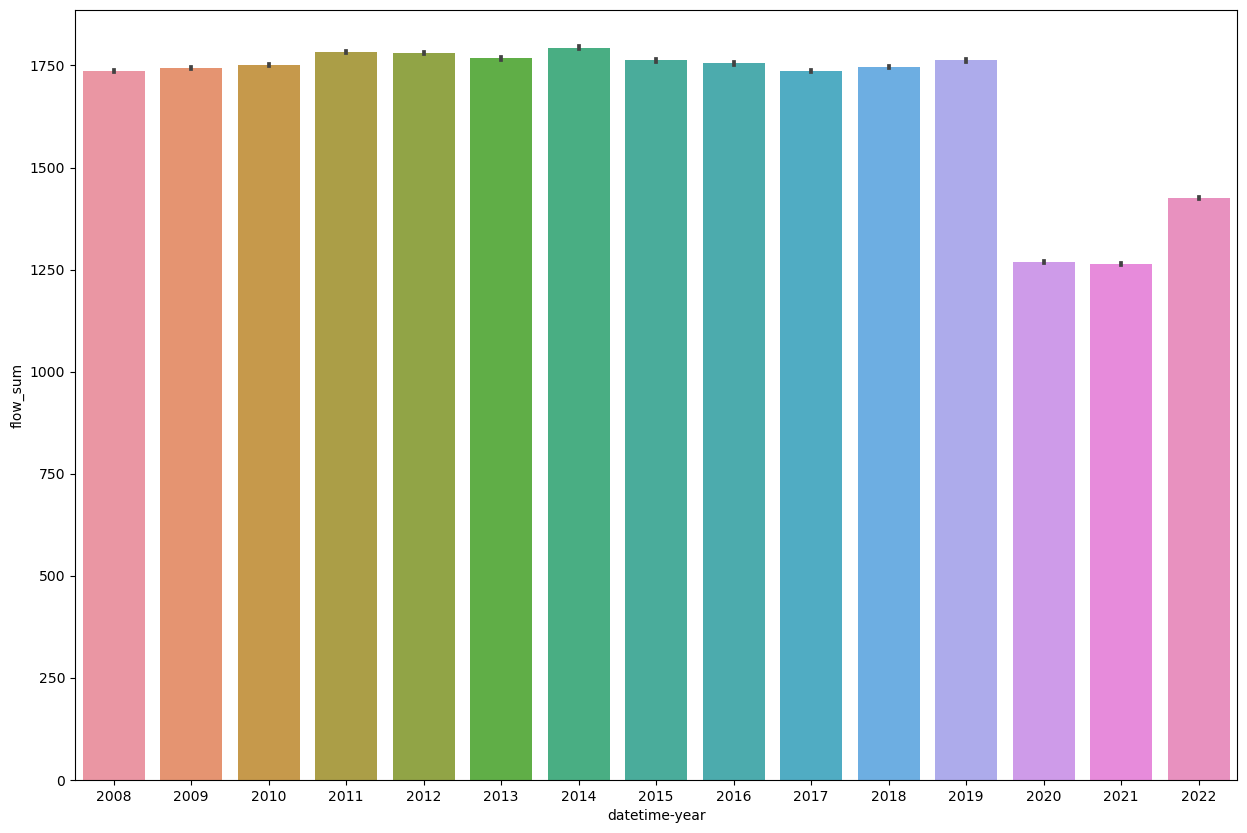

In [111]:
plt.figure(figsize=(15,10))
sns.barplot(data=subway_weather_df, x="datetime-year", y="flow_sum")

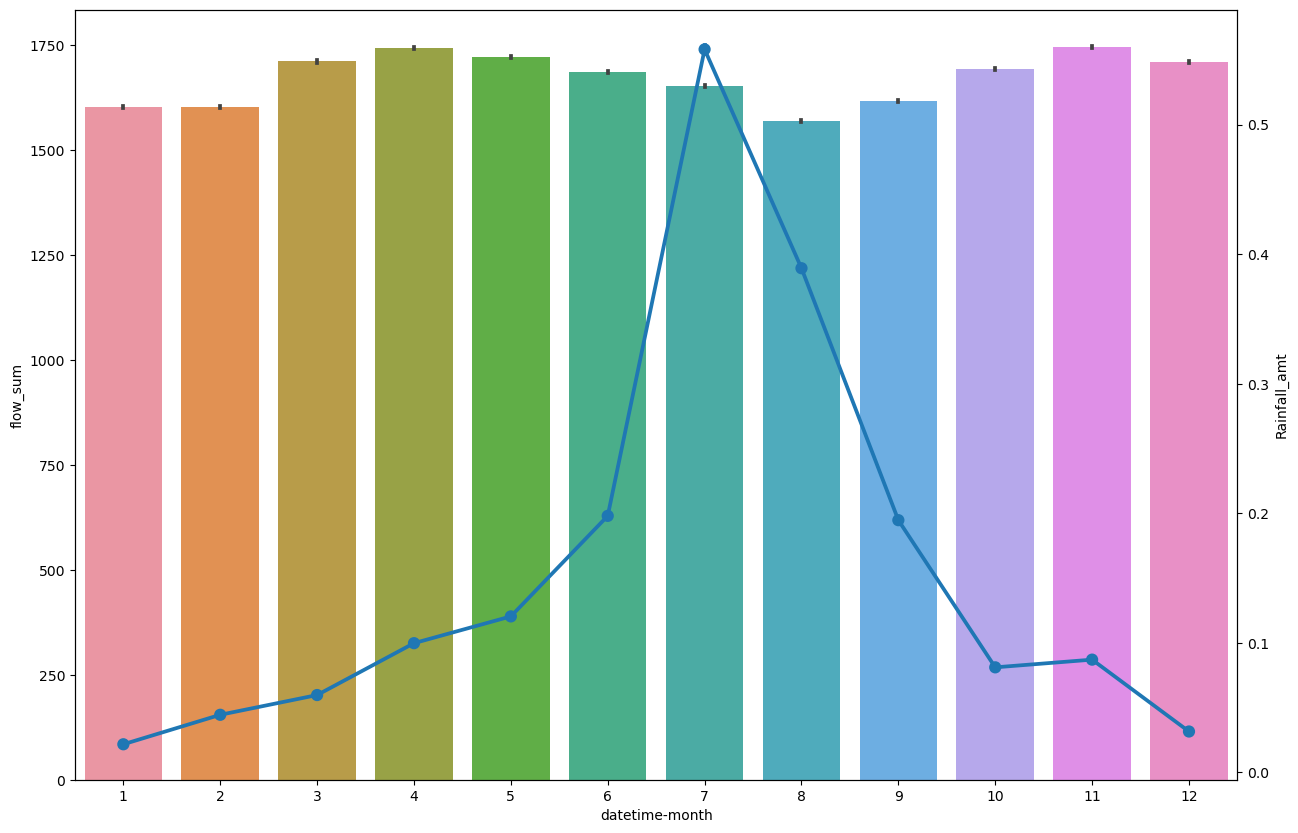

In [113]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(15, 10)

g = sns.barplot(data=subway_weather_df, x="datetime-month", y="flow_sum", ax=ax1)

ax2 = ax1.twinx()
g2 = sns.pointplot(data=subway_weather_df, x="datetime-month", y='Rainfall_amt', dodge=False, ax=ax2)

In [136]:
sample_df = subway_weather_df.sample(200000)

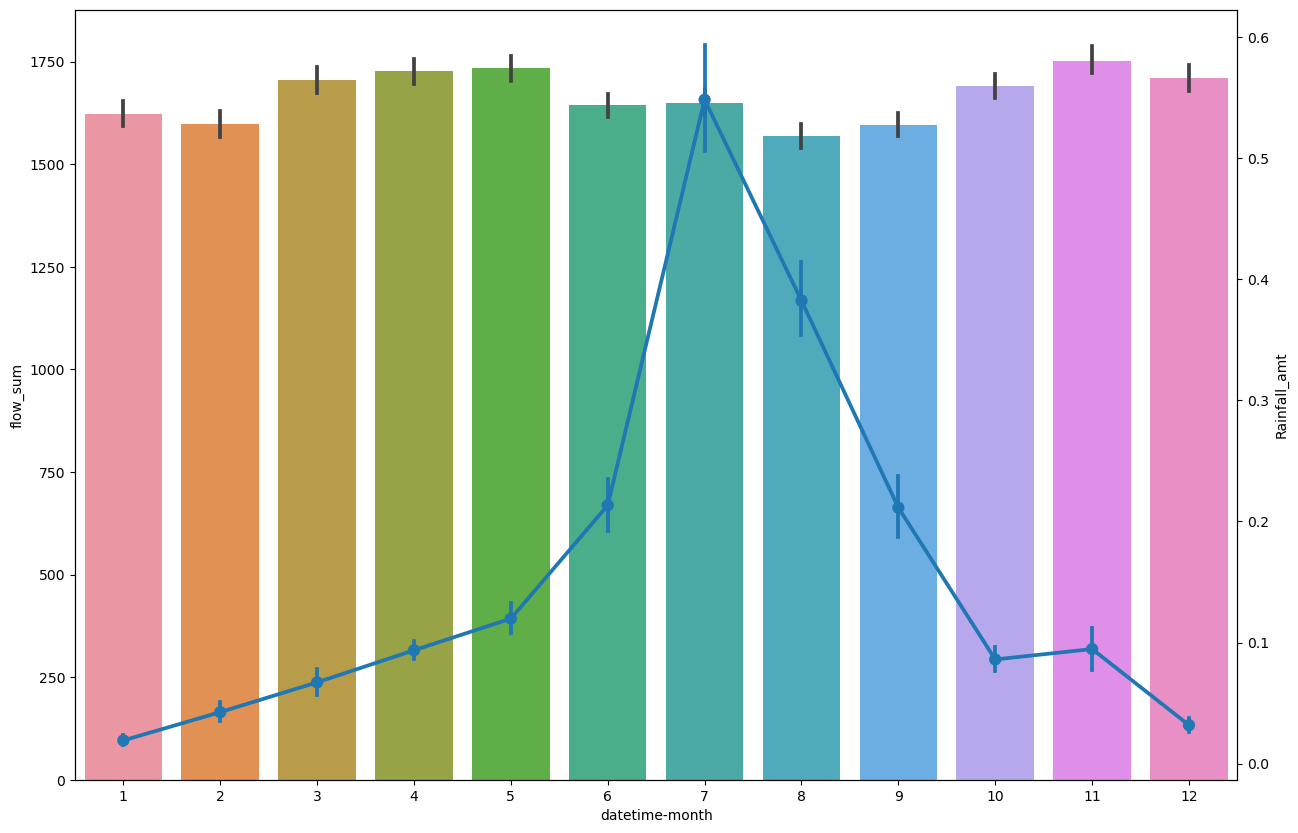

In [137]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(15, 10)

g = sns.barplot(data=sample_df, x="datetime-month", y="flow_sum", ax=ax1)

ax2 = ax1.twinx()
g2 = sns.pointplot(data=sample_df, x="datetime-month", y='Rainfall_amt', dodge=False, ax=ax2)

In [143]:
sample_df['rainy'] = sample_df['Rainfall_amt']>0.0

sample_df['rainy'] = sample_df['rainy'].astype(np.int32)

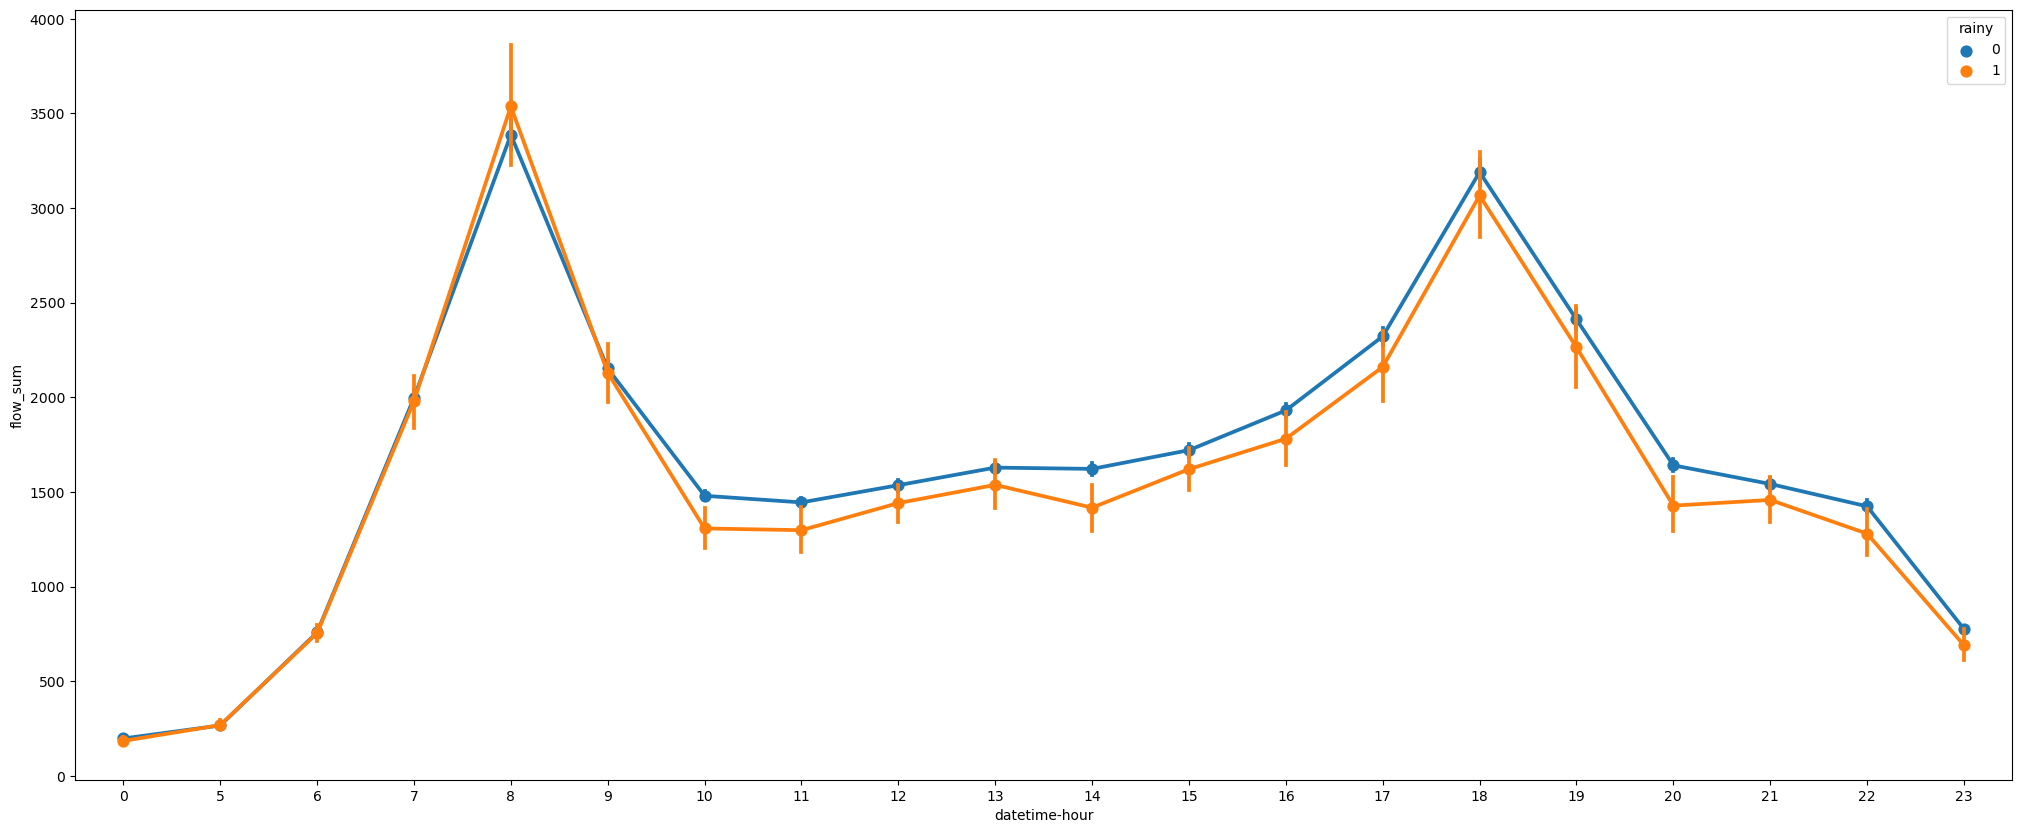

In [145]:
figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(25, 10)

g= sns.pointplot(data=sample_df, x="datetime-hour", y="flow_sum",hue='rainy', ax=ax3)


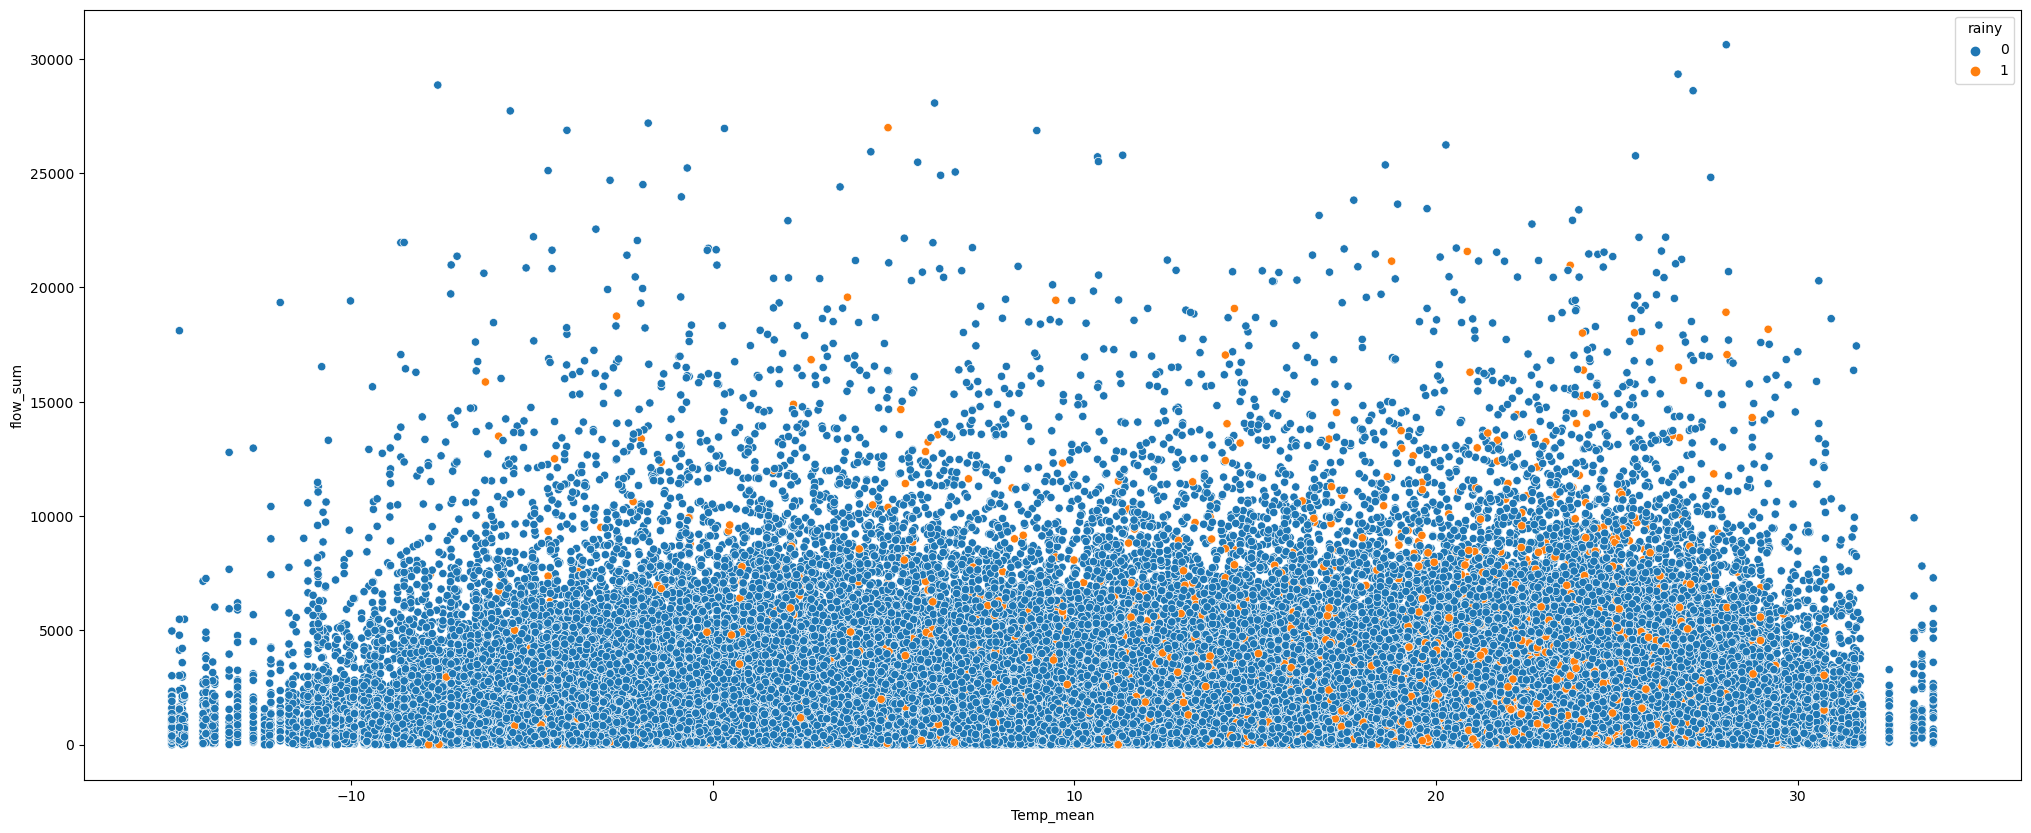

In [147]:
figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(25, 10)

g= sns.scatterplot(data=sample_df, x="Temp_mean", y="flow_sum",hue='rainy', ax=ax3)

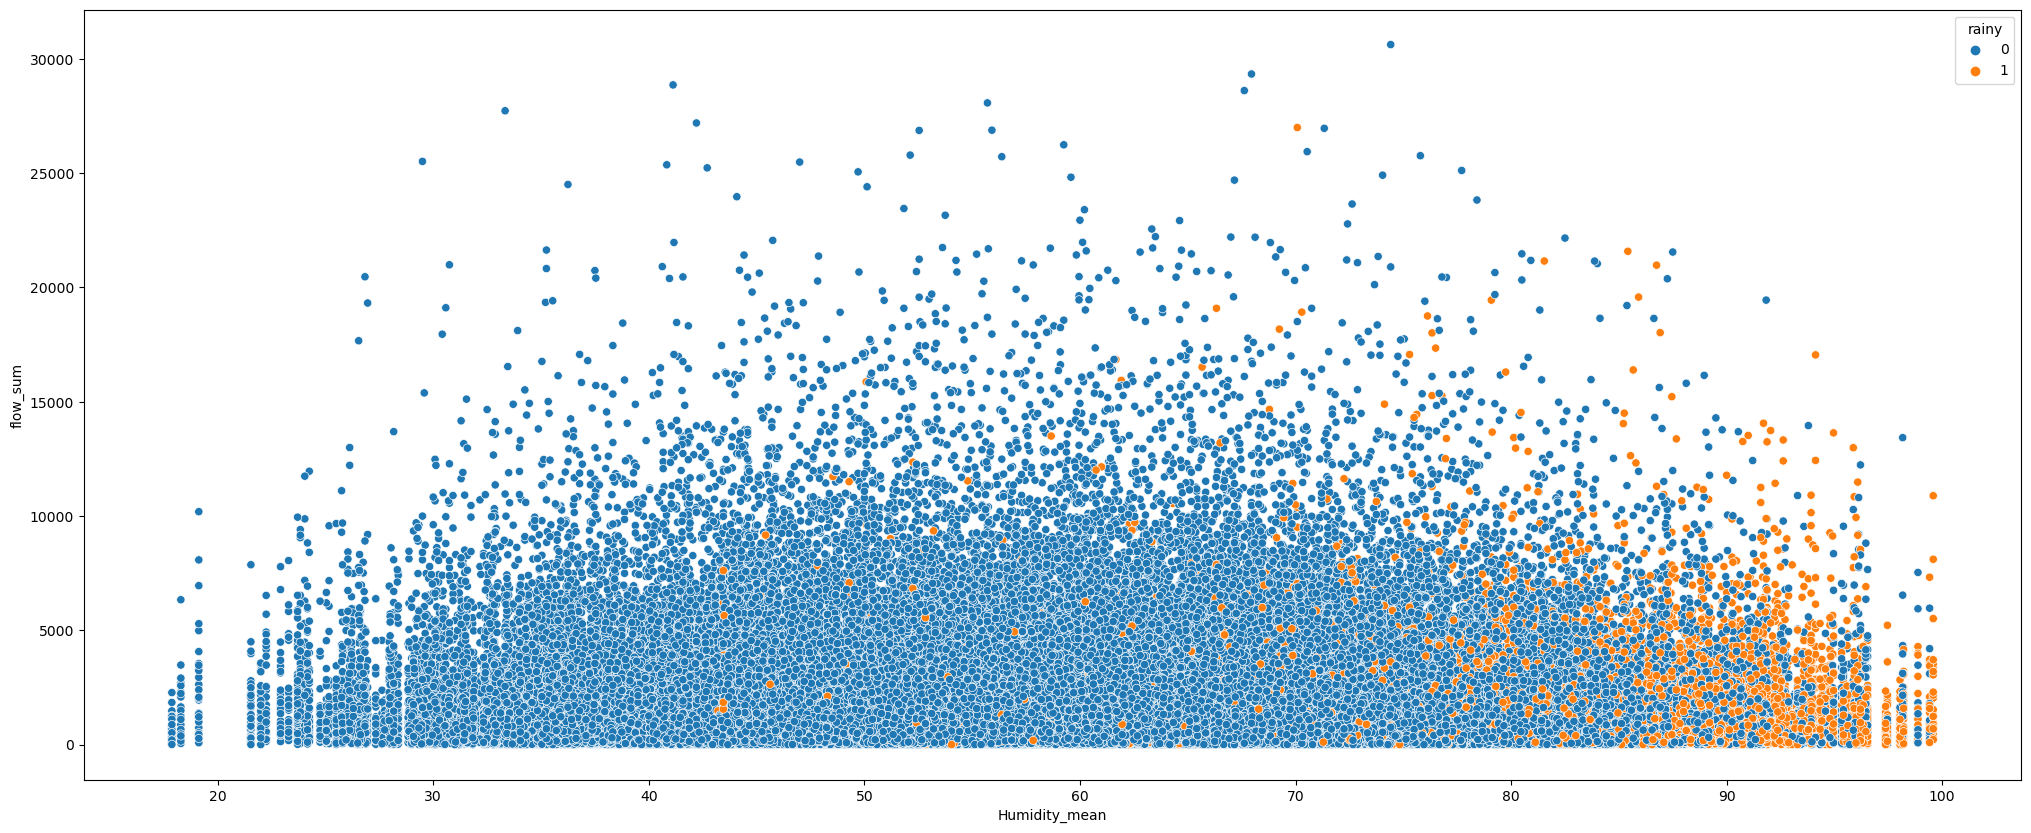

In [148]:
figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(25, 10)

g= sns.scatterplot(data=sample_df, x="Humidity_mean", y="flow_sum",hue='rainy', ax=ax3)